In [1]:
from sklearn import preprocessing
from python_speech_features import mfcc, delta
import numpy as np
import noisereduce as nr
from scipy.io import wavfile


In [2]:
from pydub import AudioSegment
from matplotlib import pyplot as plt

## Feature Extraction

In [3]:
rate, audio = wavfile.read("../data/03_preprocessed/PTT-20191230-WA0012.wav")

In [4]:
mfcc_feature = mfcc(
    audio, 
    rate,
    winlen=0.020,
    preemph=0.95, 
    numcep=20, 
    nfft=1024, 
    ceplifter=15, 
    highfreq=6000,
    nfilt=55,
    appendEnergy=False
)
mfcc_feature.shape

(476, 20)

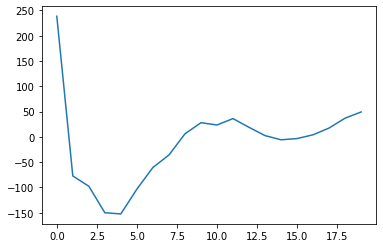

In [5]:
plt.plot(mfcc_feature[0])

In [6]:
# feature scaling
# mfcc_feature = preprocessing.scale(mfcc_feature)
delta_feature = delta(mfcc_feature, 2) # calculating delta
# stacking delta features with common features
combined_features = np.hstack((mfcc_feature, delta_feature))

In [ ]:
(rate, sig) = wavfile.read("../2_data/02_preprocessed/PTT-20191230-WA0012.wav")
features = extract_features(sig, rate)

In [ ]:
features.shape

## Voice activity identification

Find segments of non-voice and remove them

In [ ]:
rate, sig = wavfile.read("../2_data/02_preprocessed/PTT-20191230-WA0012.wav")

plt.plot(sig)
plt.show()

sig_short = shorten_array(sig, min_length=1000, min_value=1e6)
plt.plot(sig_short)
plt.show()

length_reduction = 1 - len(sig_short) / len(sig)
print(f"Length reduced by {length_reduction:.2%}")

wavfile.write(data=sig_short, rate=rate, filename="../2_data/02_preprocessed/PTT-20191230-WA0012_short.wav")